In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#rc('text', usetex=True)
% matplotlib inline

In [4]:
free531bsf=nc.Dataset('Comparisons/Comp531_free_bo.nc')
comp=free531bsf.variables['comparison']
compAr=np.array(comp)
flatCompAr=compAr.flatten()
flatCompAr=flatCompAr[np.isfinite(flatCompAr)]
free531bsf.close()

In [5]:
lolimIdx=flatCompAr>=-150
hilimIdx =flatCompAr<=150
goodIdx=lolimIdx*hilimIdx

In [6]:
del comp,compAr

In [7]:
old531bsf=nc.Dataset('Comparisons/Comp531bo_nc.nc')
comp=old531bsf.variables['comparison_old_bs']
compAr=np.array(comp)
flatCompAr2=compAr.flatten()
flatCompAr2=flatCompAr2[np.isfinite(flatCompAr2)]
old531bsf.close()

In [8]:
lolimIdx2=flatCompAr2>=-150
hilimIdx2 =flatCompAr2<=150
goodIdx2=lolimIdx2*hilimIdx2

In [9]:
del comp,compAr

In [10]:
nn531bsf=nc.Dataset('Comparisons/Comp531nn_nc.nc')

In [11]:
comp=nn531bsf.variables['comparison']
compAr=np.array(comp)
flatCompArNN=compAr.flatten()
flatCompArNN=flatCompArNN[np.isfinite(flatCompArNN)]
nn531bsf.close()

In [12]:
lolimIdxnn=flatCompArNN>=-150
hilimIdxnn =flatCompArNN<=150
goodIdxnn=lolimIdxnn*hilimIdxnn

In [18]:
lo1=np.percentile(flatCompAr[goodIdx],5)
hi1=np.percentile(flatCompAr[goodIdx],95)
med1=np.percentile(flatCompAr[goodIdx],50)

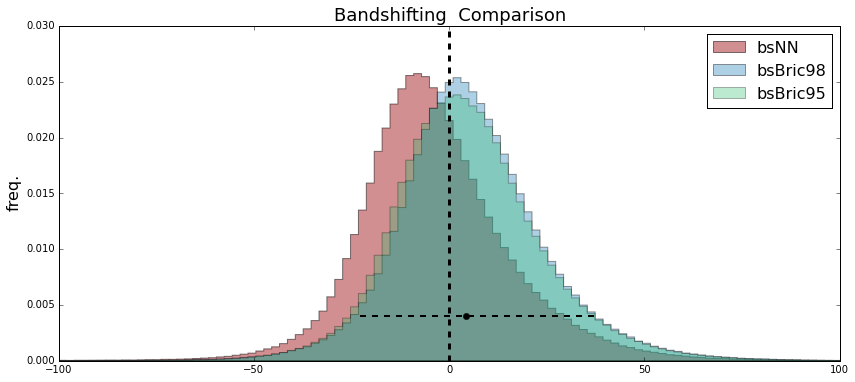

In [23]:
bns=np.linspace(-100,100,100);
plt.figure(figsize=(14,6))
plt.title('Bandshifting  Comparison',fontsize=18)
plt.hist(flatCompArNN[goodIdxnn],bins=bns,normed='yes',histtype='stepfilled',alpha=0.5,label='bsNN',color='#A62026');
plt.hist(flatCompAr[goodIdx],bins=bns,normed='yes',histtype='stepfilled',label='bsBric98',alpha=0.4,color='#348ABD');
plt.hist(flatCompAr2[goodIdx2],bins=bns,normed='yes',histtype='stepfilled',alpha=0.3,label='bsBric95',color='#23BC65');
plt.ylabel('freq.',fontsize=16)
plt.legend(loc='best',fontsize=16)
plt.vlines(0,0,0.03,linestyle='--',lw=3);
plt.plot(med1,0.004,'ko')
plt.hlines(0.004,lo1,hi1,linestyle='--',lw=2);